In [1]:
# Core data tools
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier plots (Seaborn style)
sns.set(style="whitegrid", palette="pastel")

df= pd.read_csv("Cleaned_Final.csv")

In [2]:
df.describe()

,Age,Academic_Year,Current_CGPA,waiver_or_scholarship,PSS1,PSS2,PSS3,PSS4,PSS5,PSS6,...,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,Depression_Value
count,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,...,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
mean,21.652572,2.311078,3.274552,0.209693,2.350148,2.325915,2.707715,2.368447,2.175569,1.792779,...,1.463897,1.796241,1.663205,1.959446,1.503462,1.790307,1.640950,1.440158,1.174580,14.432245
std,2.303610,1.190290,0.416625,0.407190,1.179592,1.157174,1.132983,1.223736,1.084430,1.098822,...,0.956466,1.035264,1.059731,0.974863,1.045117,1.073520,1.027415,1.027639,1.141926,6.672305
min,17.000000,0.000000,2.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,3.200000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,9.000000
50%,20.000000,2.000000,3.200000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,15.000000
75%,24.500000,3.000000,3.600000,0.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,19.000000
max,32.000000,4.000000,3.900000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,27.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 51 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Age                                                              2022 non-null   float64
 1   Academic_Year                                                    2022 non-null   int64  
 2   Current_CGPA                                                     2022 non-null   float64
 3   waiver_or_scholarship                                            2022 non-null   int64  
 4   PSS1                                                             2022 non-null   int64  
 5   PSS2                                                             2022 non-null   int64  
 6   PSS3                                                             2022 non-null   int64  
 7   PSS4                                      

In [4]:
df.select_dtypes(exclude="object").dropna().corr().Depression_Value.sort_values(ascending=False)

Depression_Value                                                   1.000000
PHQ2                                                               0.809948
PHQ6                                                               0.797677
Anxiety_Value                                                      0.769748
PHQ7                                                               0.755414
PHQ4                                                               0.750313
PHQ3                                                               0.730247
PHQ8                                                               0.729667
PHQ5                                                               0.707649
PHQ9                                                               0.702560
GAD7                                                               0.667493
GAD5                                                               0.643668
GAD4                                                               0.642538
GAD1        

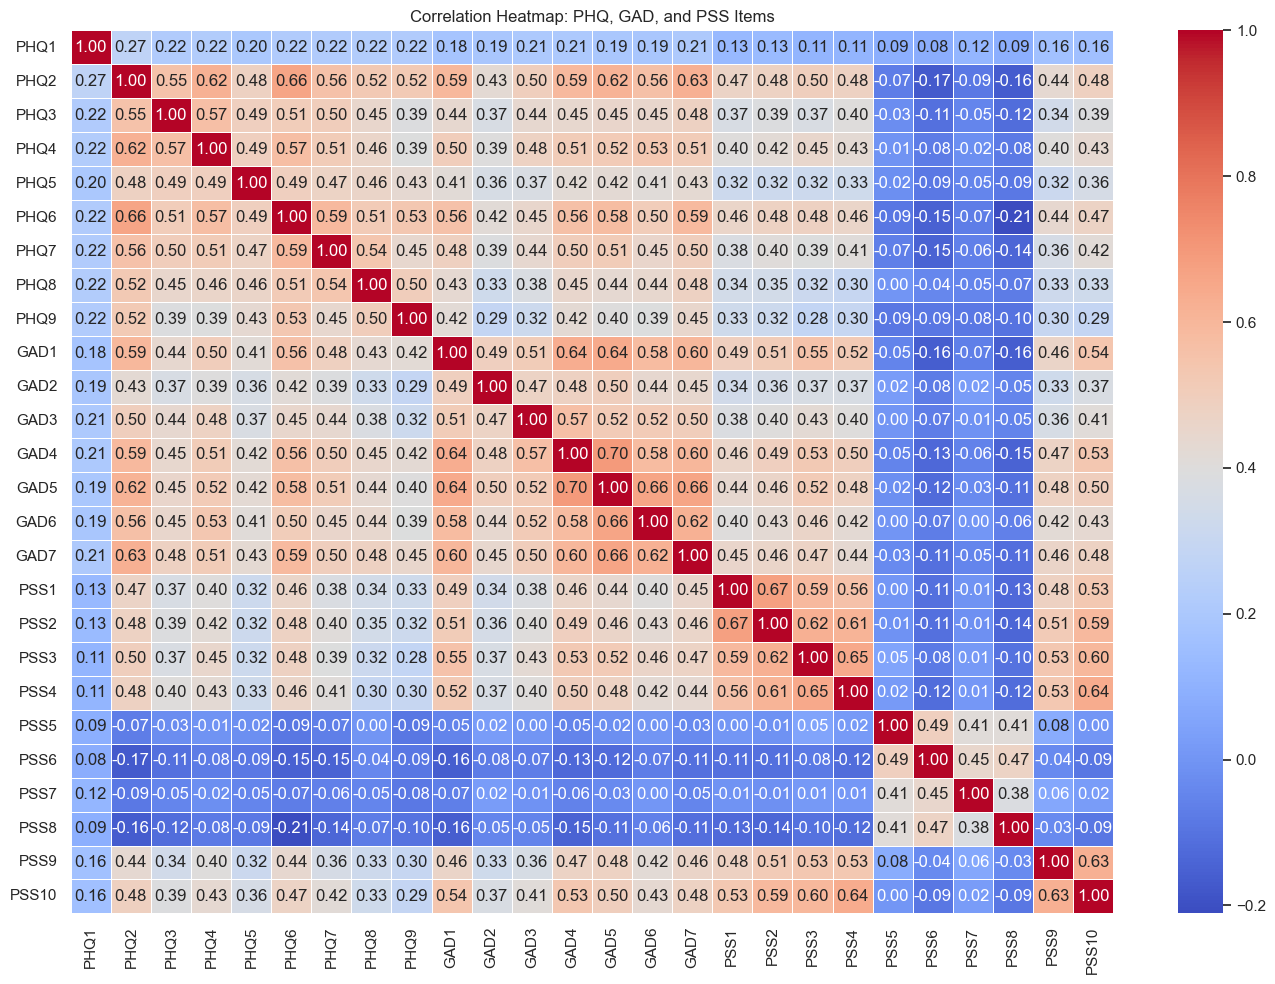

In [5]:
# === 🔥 Correlation Heatmap: PHQ / GAD / PSS ===
phq_cols = [col for col in df.columns if col.startswith("PHQ")]
gad_cols = [col for col in df.columns if col.startswith("GAD")]
pss_cols = [col for col in df.columns if col.startswith("PSS")]
score_cols = phq_cols + gad_cols + pss_cols

plt.figure(figsize=(14, 10))
corr_matrix = df[score_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: PHQ, GAD, and PSS Items")
plt.tight_layout()
plt.show()

/var/folders/8y/7z7bnlwn40s6mhwg565vp_4w0000gn/T/ipykernel_21819/2588447341.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Gender", y="Depression_Value", ci=None)


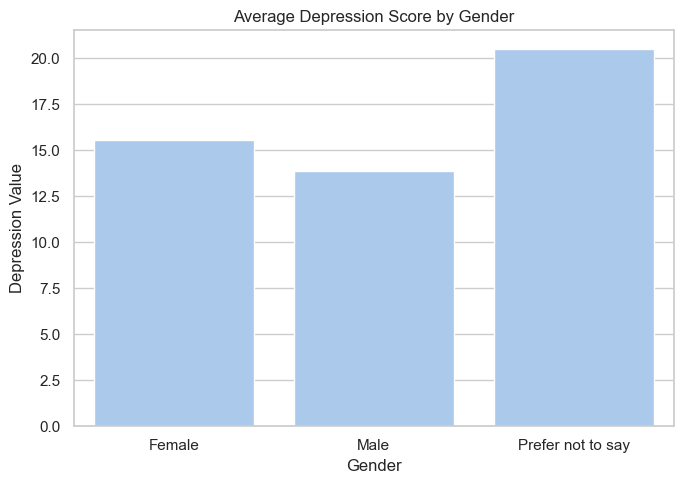

In [9]:
# === 📊 Depression Value by Gender ===
df["Gender"] = df.apply(
    lambda row: "Male" if row.get("Gender_Male") else (
        #"Prefer not to say" if row.get("Gender_Prefer_not_to_say") else "Female"
        "Female" if row.get("Gender_Female") else "Prefer not to say"
    ),
    axis=1
)

plt.figure(figsize=(7, 5))
sns.barplot(data=df, x="Gender", y="Depression_Value", ci=None)
plt.title("Average Depression Score by Gender")
plt.ylabel("Depression Value")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

/var/folders/8y/7z7bnlwn40s6mhwg565vp_4w0000gn/T/ipykernel_21819/2628589506.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="CGPA_Range", y="Depression_Value", ci=None)


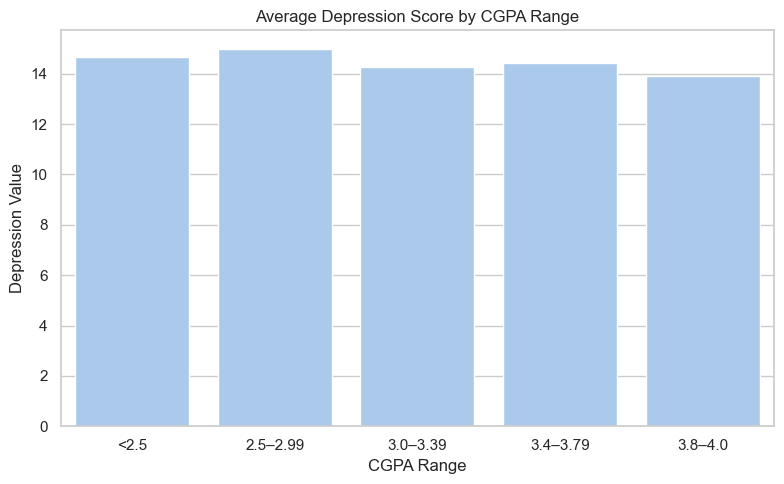

In [10]:
# === 📊 Depression by CGPA Bins ===
cgpa_bins = [0, 2.49, 2.99, 3.39, 3.79, 4.01]
cgpa_labels = ['<2.5', '2.5–2.99', '3.0–3.39', '3.4–3.79', '3.8–4.0']
df["CGPA_Range"] = pd.cut(df["Current_CGPA"], bins=cgpa_bins, labels=cgpa_labels)

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="CGPA_Range", y="Depression_Value", ci=None)
plt.title("Average Depression Score by CGPA Range")
plt.ylabel("Depression Value")
plt.xlabel("CGPA Range")
plt.tight_layout()
plt.show()

/var/folders/8y/7z7bnlwn40s6mhwg565vp_4w0000gn/T/ipykernel_21819/1195709706.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Department", y="Depression_Value", ci=None)


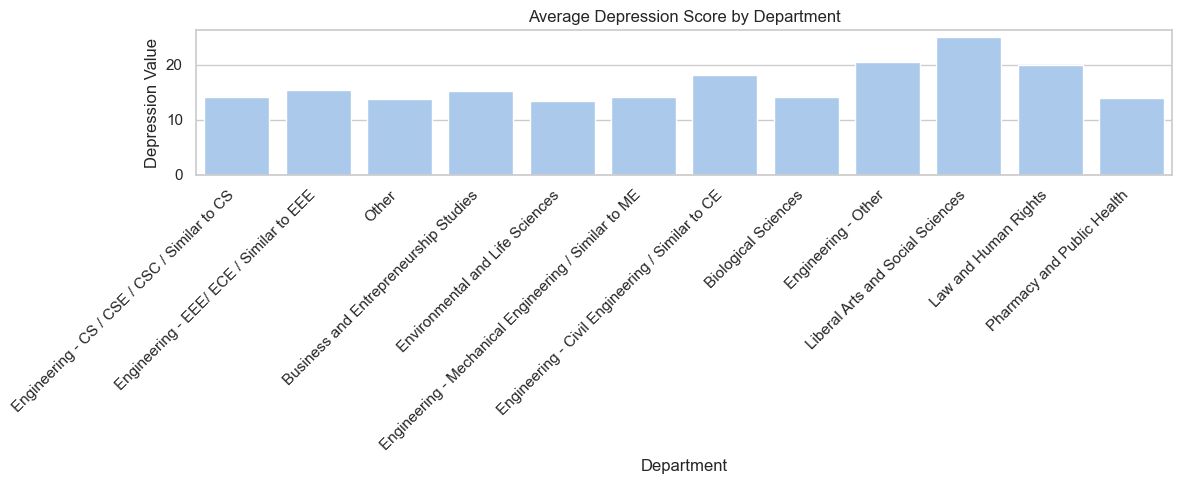

In [11]:
# === 📊 Depression by Department ===
# Reconstruct Department labels
df["Department"] = df[[col for col in df.columns if col.startswith("Department_")]].idxmax(axis=1)
df["Department"] = df["Department"].str.replace("Department_", "").str.replace("_", " ")

plt.figure(figsize=(12, 5))
sns.barplot(data=df, x="Department", y="Depression_Value", ci=None)
plt.title("Average Depression Score by Department")
plt.ylabel("Depression Value")
plt.xlabel("Department")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

/var/folders/8y/7z7bnlwn40s6mhwg565vp_4w0000gn/T/ipykernel_21819/3888217688.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Academic_Year", y="Depression_Value", ci=None)


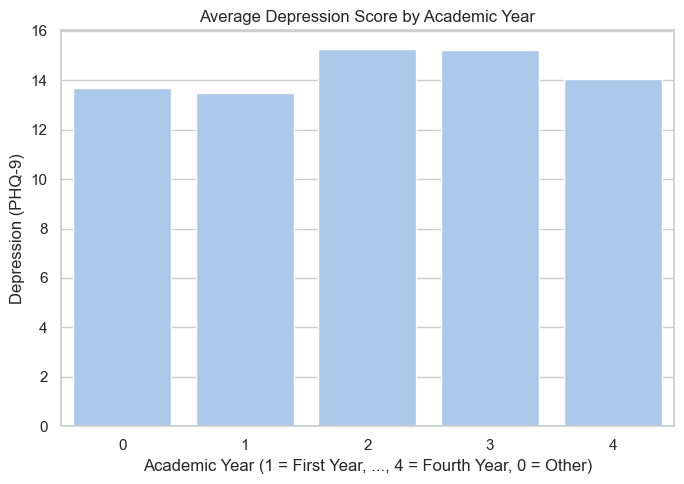

In [12]:
# === 📊 Depression by Academic Year ===
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x="Academic_Year", y="Depression_Value", ci=None)
plt.title("Average Depression Score by Academic Year")
plt.xlabel("Academic Year (1 = First Year, ..., 4 = Fourth Year, 0 = Other)")
plt.ylabel("Depression (PHQ-9)")
plt.tight_layout()
plt.show()

/var/folders/8y/7z7bnlwn40s6mhwg565vp_4w0000gn/T/ipykernel_21819/2246748605.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Has_Scholarship", y="Depression_Value", ci=None)


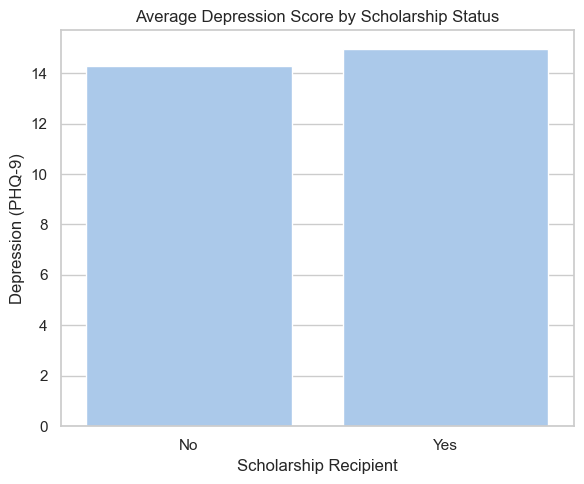

In [13]:
# === 📊 Depression by Scholarship Status ===
df["Has_Scholarship"] = df["waiver_or_scholarship"].map({1: "Yes", 0: "No"})

plt.figure(figsize=(6, 5))
sns.barplot(data=df, x="Has_Scholarship", y="Depression_Value", ci=None)
plt.title("Average Depression Score by Scholarship Status")
plt.xlabel("Scholarship Recipient")
plt.ylabel("Depression (PHQ-9)")
plt.tight_layout()
plt.show()

/var/folders/8y/7z7bnlwn40s6mhwg565vp_4w0000gn/T/ipykernel_21819/3978823224.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Age_Group", y="Depression_Value", ci=None)


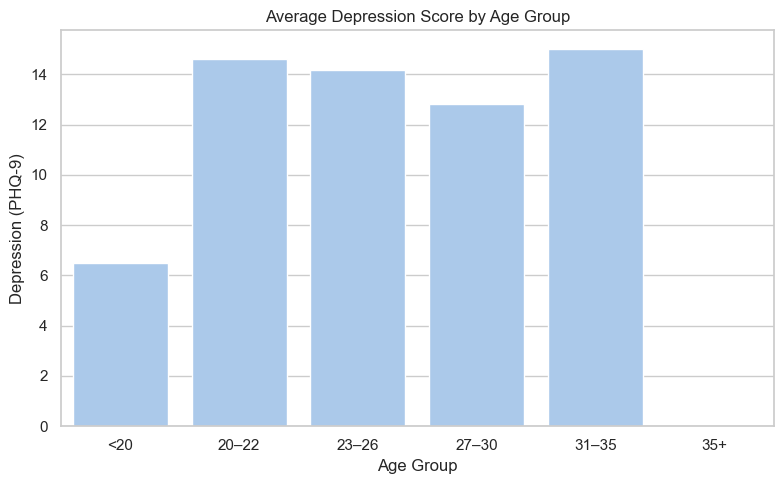

In [14]:
# === 📊 Depression by Age (binned for visibility) ===
age_bins = [0, 19, 22, 26, 30, 35, 100]
age_labels = ["<20", "20–22", "23–26", "27–30", "31–35", "35+"]
df["Age_Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Age_Group", y="Depression_Value", ci=None)
plt.title("Average Depression Score by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Depression (PHQ-9)")
plt.tight_layout()
plt.show()